In [69]:
import pandas as pd

from itertools import combinations
from scipy import stats

from news_vec.utils import read_json_gz_lines

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [44]:
rows = []
for row in read_json_gz_lines('../data/clf-ab-ts.json/'):
    rows.append((row['d1'], row['d2'], row['w'], row['acc']))
    rows.append((row['d2'], row['d1'], row['w'], row['acc']))

In [45]:
df = pd.DataFrame(rows, columns=('d1', 'd2', 'w', 'acc'))

In [70]:
pdf = df[(df.d1=='apnews.com')&(df.d2=='nytimes.com')]

In [73]:
lr = stats.linregress(pdf.w, pdf.acc)

In [79]:
y = lr.slope*pdf.w + lr.intercept

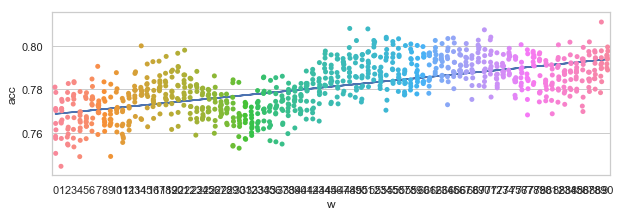

In [81]:
plt.figure(figsize=(10,3))
plt.plot(pdf.w, y)
sns.stripplot(x='w', y='acc', data=pdf, s=5)

In [59]:
domains = df.d1.unique()

In [63]:
pairs = list(combinations(domains, 2))

In [90]:
rows = []
for d1, d2 in pairs:
    pdf = df[(df.d1==d1)&(df.d2==d2)]
    lr = stats.linregress(pdf.w, pdf.acc)
    rows.append((d1, d2, lr.slope, lr.intercept, lr.pvalue))

In [91]:
lrdf = pd.DataFrame(rows, columns=('d1', 'd2', 'slope', 'intercept', 'p'))

In [110]:
lrdf['pair'] = lrdf[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [92]:
lrdf.sort_values('slope', ascending=False).head(10)

,d1,d2,slope,intercept,p
63,apnews.com,foxnews.com,0.000588,0.679998,1.710274e-224
11,buzzfeed.com,huffingtonpost.com,0.000476,0.736754,4.316469e-127
103,washingtonpost.com,foxnews.com,0.000421,0.738227,6.707057e-191
13,buzzfeed.com,foxnews.com,0.000420,0.843112,3.068850e-213
97,rt.com,foxnews.com,0.000413,0.752155,2.155507e-140
90,breitbart.com,foxnews.com,0.000362,0.728713,6.216482e-86
3,buzzfeed.com,apnews.com,0.000341,0.898846,6.031305e-206
58,apnews.com,washingtonpost.com,0.000338,0.778569,2.984155e-129
82,nytimes.com,foxnews.com,0.000301,0.751409,8.817000e-170
6,buzzfeed.com,breitbart.com,0.000291,0.870267,4.311185e-118


In [93]:
lrdf.sort_values('slope', ascending=True).head(10)

,d1,d2,slope,intercept,p
38,cnn.com,huffingtonpost.com,-0.001136,0.752891,0.000000e+00
106,dailykos.com,huffingtonpost.com,-0.001007,0.792648,0.000000e+00
116,huffingtonpost.com,thehill.com,-0.000934,0.817149,0.000000e+00
99,washingtonpost.com,dailykos.com,-0.000926,0.778151,7.609678e-213
36,cnn.com,dailykos.com,-0.000903,0.792260,8.119466e-276
109,dailykos.com,thehill.com,-0.000855,0.816550,8.220480e-236
67,sputniknews.com,rt.com,-0.000760,0.680765,4.434164e-179
78,nytimes.com,dailykos.com,-0.000716,0.818113,5.220449e-246
35,cnn.com,washingtonpost.com,-0.000705,0.744861,4.190390e-295
105,dailykos.com,npr.org,-0.000691,0.809719,5.333139e-202


apnews.com foxnews.com


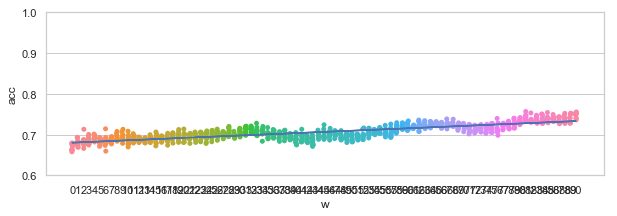

buzzfeed.com huffingtonpost.com


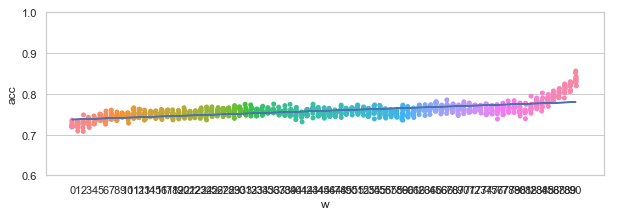

washingtonpost.com foxnews.com


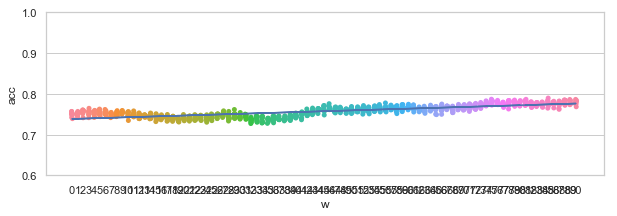

buzzfeed.com foxnews.com


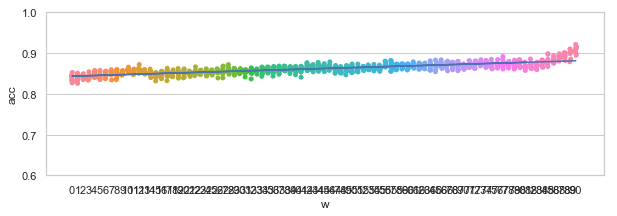

rt.com foxnews.com


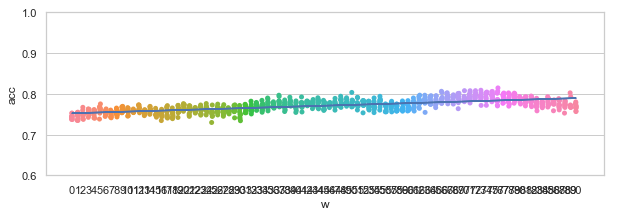

breitbart.com foxnews.com


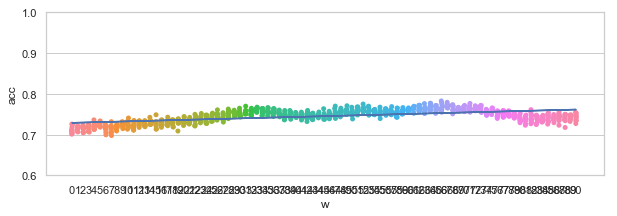

buzzfeed.com apnews.com


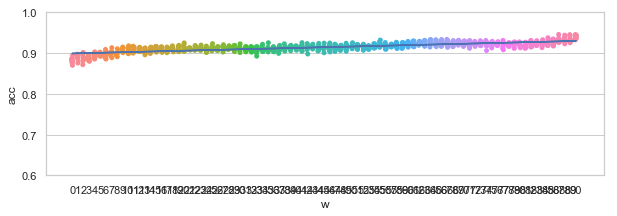

apnews.com washingtonpost.com


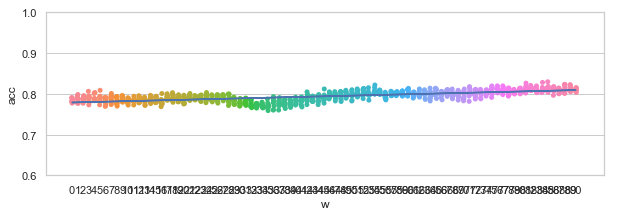

nytimes.com foxnews.com


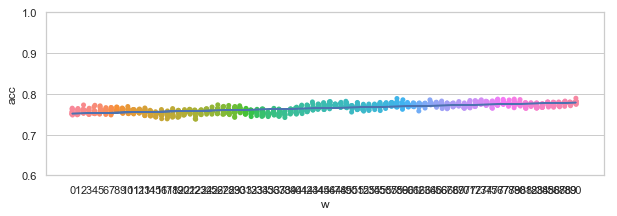

buzzfeed.com breitbart.com


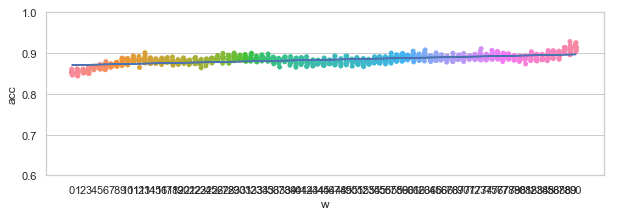

In [101]:
for r in lrdf.sort_values('slope', ascending=False).head(10).itertuples():
    
    print(r.d1, r.d2)
    
    pdf = df[(df.d1==r.d1)&(df.d2==r.d2)]
    y = r.slope*pdf.w + r.intercept
    
    plt.figure(figsize=(10,3))
    plt.ylim(0.6, 1)
    sns.stripplot(x='w', y='acc', data=pdf, s=5)
    plt.plot(pdf.w, y, zorder=10)
    plt.show()

cnn.com huffingtonpost.com


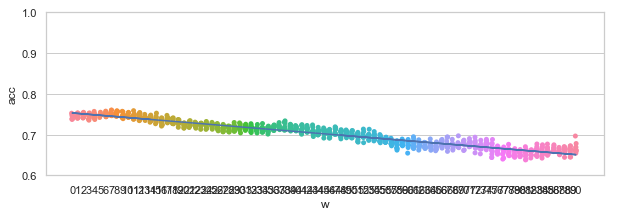

dailykos.com huffingtonpost.com


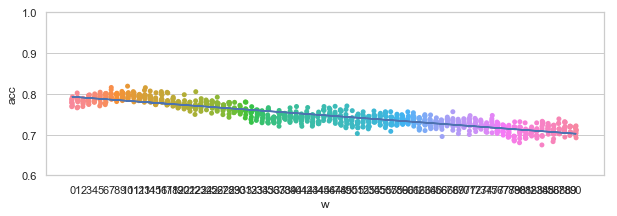

huffingtonpost.com thehill.com


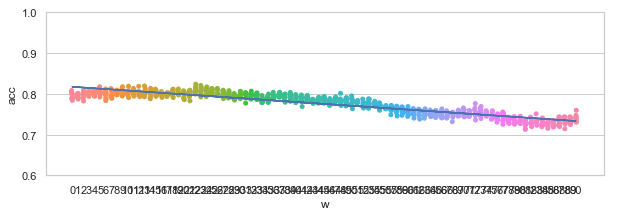

washingtonpost.com dailykos.com


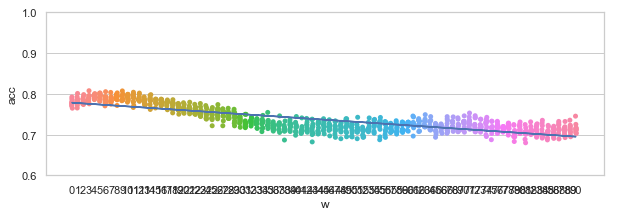

cnn.com dailykos.com


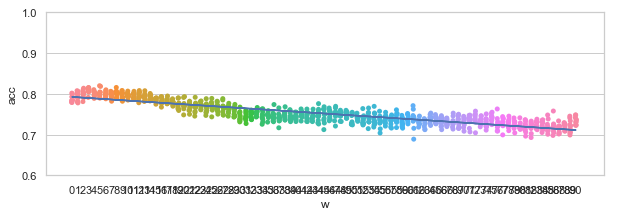

dailykos.com thehill.com


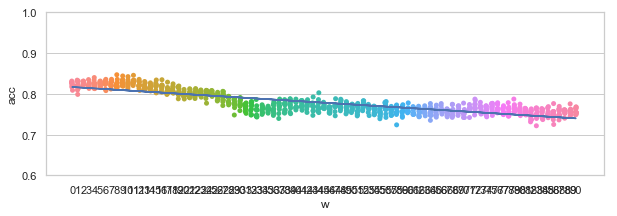

sputniknews.com rt.com


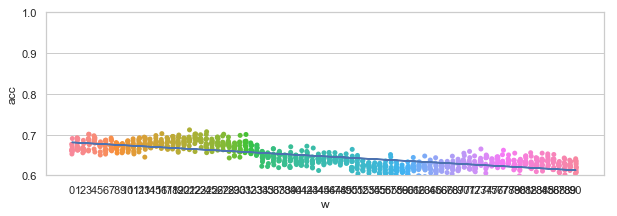

nytimes.com dailykos.com


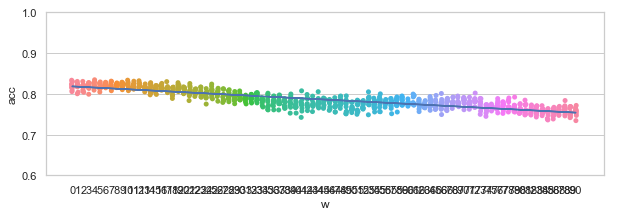

cnn.com washingtonpost.com


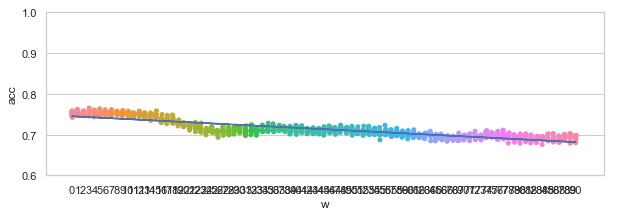

dailykos.com npr.org


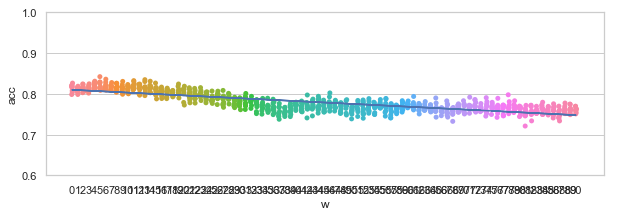

In [102]:
for r in lrdf.sort_values('slope', ascending=True).head(10).itertuples():
    
    print(r.d1, r.d2)
    
    pdf = df[(df.d1==r.d1)&(df.d2==r.d2)]
    y = r.slope*pdf.w + r.intercept
    
    plt.figure(figsize=(10,3))
    plt.ylim(0.6, 1)
    sns.stripplot(x='w', y='acc', data=pdf, s=5)
    plt.plot(pdf.w, y, zorder=10)
    plt.show()

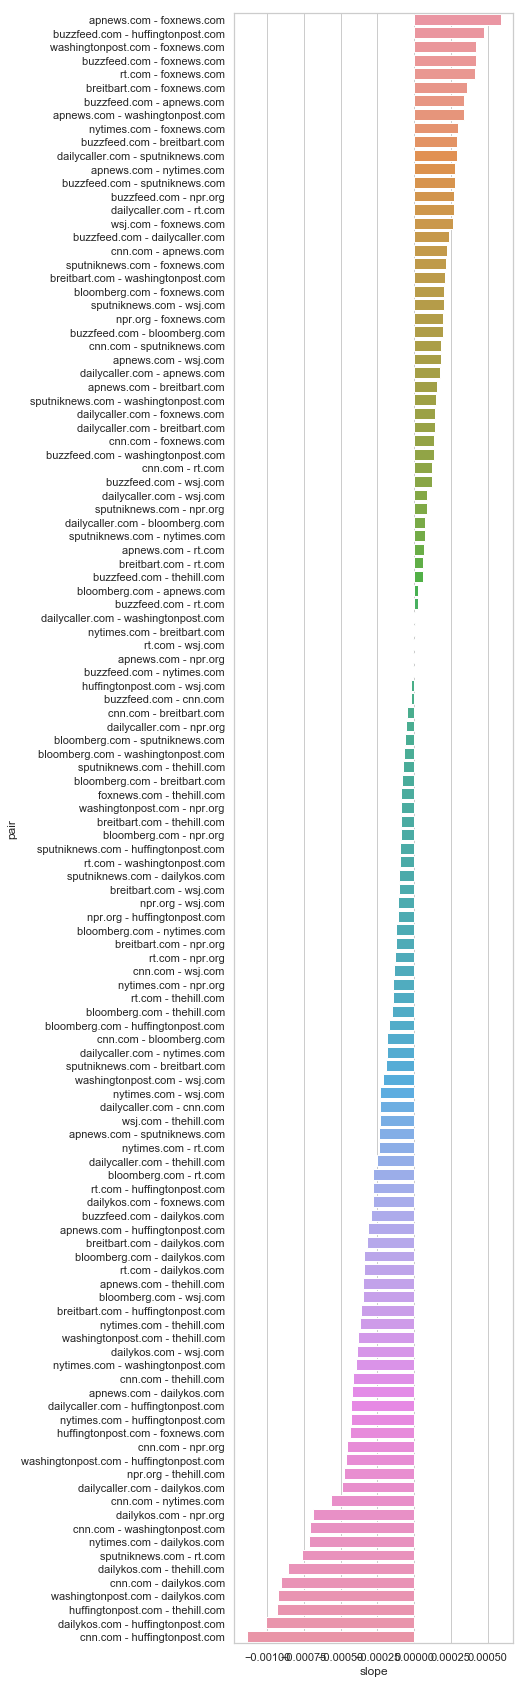

In [112]:
plt.figure(figsize=(5,30))
sns.barplot(x='slope', y='pair', data=lrdf.sort_values('slope', ascending=False))

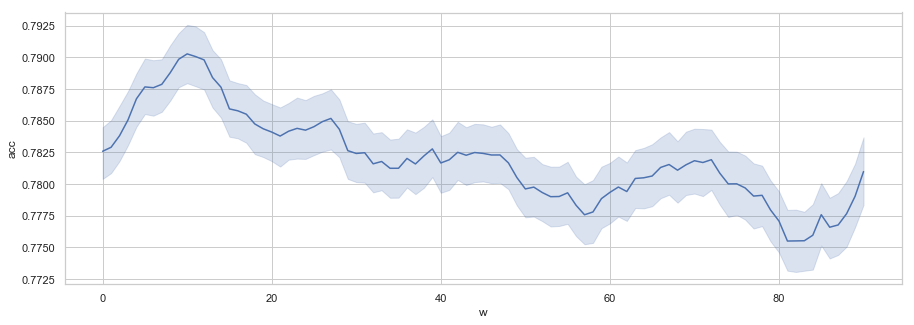

In [109]:
plt.figure(figsize=(15,5))
sns.lineplot(x='w', y='acc', data=df)

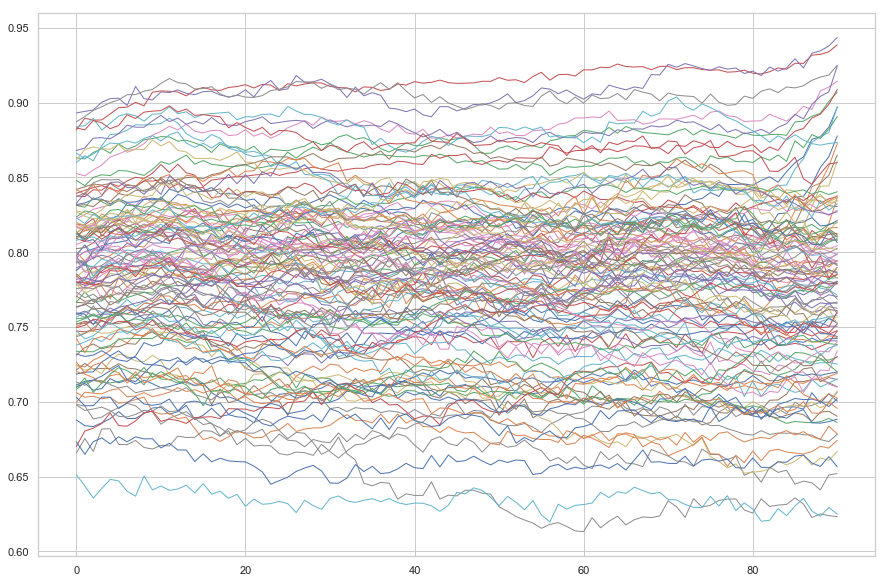

In [135]:
plt.figure(figsize=(15,10))

for d1, d2 in pairs:
    pdf = df[(df.d1==d1)&(df.d2==d2)].groupby('w').mean()
    plt.plot(pdf.index, pdf.acc, linewidth=1)